## HIPERPARAMETER OPTIMIZATION

## Optuna

Optuna es un framework de optimización automática de hiperparámetros diseñado para hacer que el proceso de ajuste de modelos de machine learning sea más eficiente y flexible. Aquí te detallo sus aspectos clave:

Conceptos Fundamentales:

Estudios (Studies):
Un estudio en Optuna representa un proceso completo de optimización. Contiene todas las pruebas y los resultados asociados.
Pruebas (Trials):
Una prueba es un intento de evaluar un conjunto específico de hiperparámetros. Optuna explora diferentes combinaciones de hiperparámetros a través de múltiples pruebas.
Función Objetivo:
Debes definir una función objetivo que Optuna intentará minimizar o maximizar. Esta función generalmente evalúa el rendimiento de tu modelo utilizando un conjunto de validación.
Características Distintivas:

Define-by-Run:
Optuna permite definir el espacio de búsqueda de hiperparámetros de forma dinámica dentro de la función objetivo. Esto proporciona una gran flexibilidad, especialmente cuando los hiperparámetros dependen unos de otros.
Algoritmos de Muestreo Eficientes:
Optuna implementa algoritmos de muestreo avanzados que le permiten explorar el espacio de búsqueda de manera eficiente. Esto incluye algoritmos basados en procesos gaussianos y otros métodos bayesianos.
Poda (Pruning):
Optuna puede podar automáticamente las pruebas que muestran un rendimiento deficiente durante el entrenamiento. Esto ahorra tiempo y recursos al evitar la evaluación completa de combinaciones de hiperparámetros poco prometedoras.
Visualizaciones:
Optuna proporciona herramientas de visualización que te permiten analizar el proceso de optimización. Puedes ver la importancia de los hiperparámetros, la evolución del rendimiento y otras métricas útiles.
Integración:
Optuna se integra fácilmente con muchos frameworks de machine learning populares, como scikit-learn, TensorFlow, PyTorch y XGBoost.
En resumen:

Optuna se destaca por su flexibilidad, eficiencia y facilidad de uso. Su capacidad "define-by-run" y sus algoritmos de muestreo avanzados lo convierten en una herramienta poderosa para la optimización de hiperparámetros en una amplia gama de aplicaciones de machine learning.
### Visualizaciones incluidas:
Importancia de los hiperparámetros (plot_param_importances)
Evolución del rendimiento a lo largo de las iteraciones (plot_optimization_history)
Relaciones entre hiperparámetros y el rendimiento (plot_slice)
Matriz de interacciones entre los hiperparámetros (plot_parallel_coordinate)

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.7 MB/s eta 0:00:00


[I 2025-02-26 12:34:11,863] A new study created in memory with name: no-name-82e2704d-af8b-4bba-873f-29a7b1a65d75
<ipython-input-3-d309168c95c4>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
[I 2025-02-26 12:34:14,717] Trial 1 finished with value: 0.37803542684629293 and parameters: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.011869464486300248, 'subsample': 0.8650189394195544}. Best is trial 1 with value: 0.37803542684629293.
<ipython-input-3-d309168c95c4>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
[I 2025-02-

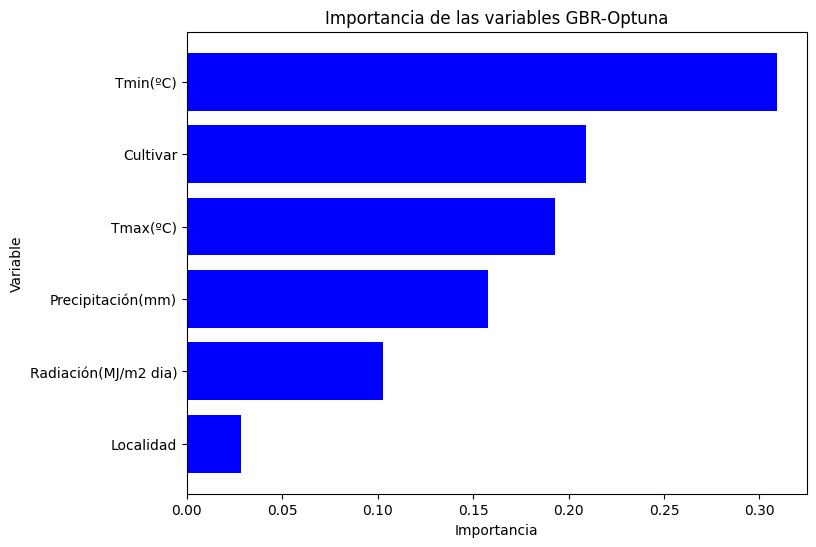

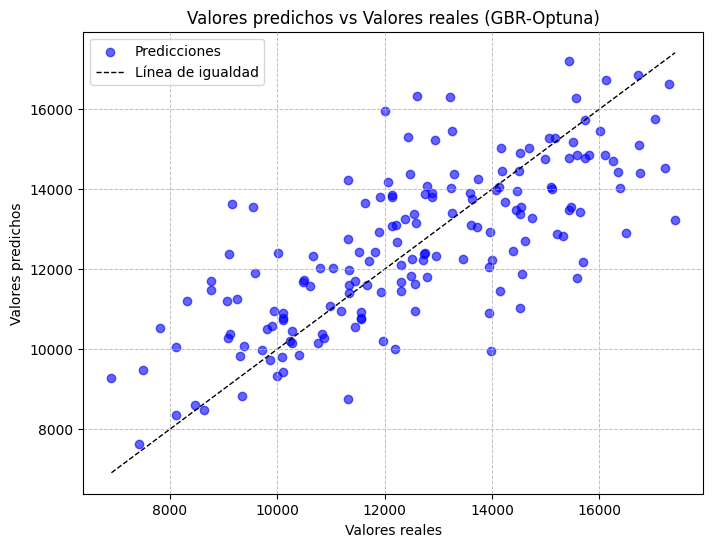

{'Mejores hiperparámetros': {'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.06169168427644684,
  'subsample': 0.7045202647539057},
 'Métricas mejor modelo': {'MAE': 1276.758239988049,
  'MSE': 2719728.1333009894,
  'RMSE': 1649.1598264877148,
  'R²': 0.5363647102030626},
 'Enlace modelo optimizado': 'gradient_boosting_optuna.pkl'}

In [3]:
# Reimportar las bibliotecas necesarias para la optimización con Optuna
# Reimportar las bibliotecas necesarias después del reinicio
import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos nuevamente
file_path = "DatosmodeloRaigrasfinalv10-yield.xlsx"
df = pd.read_excel(file_path)

# Seleccionar las variables predictoras y la variable objetivo
features = ['Localidad', 'Cultivar', 'Tmax(ºC)', 'Tmin(ºC)', 'Precipitación(mm)', 'Radiación(MJ/m2 dia)']
target = 'kg MS/ha'

# Codificar las variables categóricas
label_encoders = {}
for col in ['Localidad', 'Cultivar']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Definir X e y
X = df[features]
y = df[target]

# Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir la función objetivo para la optimización con Optuna
def objective(trial):
    # Definir los hiperparámetros a optimizar
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 2, 6)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)

    # Crear el modelo con los hiperparámetros sugeridos
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        random_state=42
    )

    # Evaluar el modelo con validación cruzada
    score = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

    return score

# Ejecutar la optimización con Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, n_jobs=-1)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params

# Ajustar el mejor modelo con los hiperparámetros óptimos
best_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    random_state=42
)

# Evaluar el mejor modelo con validación cruzada
y_pred_best = cross_val_predict(best_model, X, y, cv=kf)

# Calcular métricas de evaluación para el mejor modelo
mae_best = mean_absolute_error(y, y_pred_best)
mse_best = mean_squared_error(y, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y, y_pred_best)

# Ajustar el modelo final con todos los datos
best_model.fit(X, y)

# Guardar el modelo ajustado con Optuna
model_optuna_path = "gradient_boosting_optuna.pkl"
joblib.dump(best_model, model_optuna_path)

# Obtener importancia de las variables del mejor modelo
importances_best = best_model.feature_importances_
importance_df_best = pd.DataFrame({"Variable": features, "Importancia": importances_best})
importance_df_best = importance_df_best.sort_values(by="Importancia", ascending=False)

# Gráfica de importancia de las variables
plt.figure(figsize=(8, 6))
plt.barh(importance_df_best["Variable"], importance_df_best["Importancia"], color='blue')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las variables GBR-Optuna")
plt.gca().invert_yaxis()
plt.show()

# Gráfica de valores predichos vs reales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_best, color='blue', alpha=0.6, label="Predicciones")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=1, label="Línea de igualdad")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8)
plt.gca().set_axisbelow(False)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores predichos vs Valores reales (GBR-Optuna)")
plt.legend()

plt.show()

# Mostrar resultados
{
    "Mejores hiperparámetros": best_params,
    "Métricas mejor modelo": {"MAE": mae_best, "MSE": mse_best, "RMSE": rmse_best, "R²": r2_best},
    "Enlace modelo optimizado": model_optuna_path
}


In [4]:
# Volver a guardar el modelo ajustado con Optuna
model_optuna_path = "/gradient_boosting_optuna.pkl"
joblib.dump(best_model, model_optuna_path)

# Proporcionar el enlace de descarga del modelo optimizado
model_optuna_path

'/gradient_boosting_optuna.pkl'

### Visualizacion de hiperparametros (Optuna)

In [5]:
import optuna.visualization as ov

# 1️⃣ Importancia de los hiperparámetros en el rendimiento
fig_importance = ov.plot_param_importances(study)
fig_importance.show()

# 2️⃣ Evolución del rendimiento en función de las iteraciones
fig_history = ov.plot_optimization_history(study)
fig_history.show()

# 3️⃣ Relación entre hiperparámetros y rendimiento
fig_slice = ov.plot_slice(study)
fig_slice.show()

# 4️⃣ Matriz de interacciones entre los hiperparámetros optimizados
fig_parallel = ov.plot_parallel_coordinate(study)
fig_parallel.show()
